In [101]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [70]:
import pandas as pd
data=pd.read_csv('Online_Retail.csv',sep=',',encoding='windows-1252',header=0)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [72]:
data.shape

(541909, 8)

In [73]:
#clean the data
#missing values
round((data.isnull().sum()/len(data))*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [74]:
#drop all rows having missing values
data=data.dropna()
data.shape

(406829, 8)

In [75]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [76]:
#new column amount
data['amount']=data['Quantity']*data['UnitPrice']
data.head()

C:\Users\DELL E5440\AppData\Local\Temp\ipykernel_8464\957974360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['amount']=data['Quantity']*data['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [77]:
#prepare data for modelling

#R(Recency): No of days since last purchase
#F(Frequency):No of tranasctions
#M(Monetary):Total amount of transactions(revenue contributed)

In [78]:
#monetary
grouped_data=data.groupby('CustomerID')['amount'].sum().reset_index()
grouped_data.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [79]:
#frequency
frequency=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.columns=['CustomerID','frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [80]:
#merge 2 df's
grouped_data=pd.merge(grouped_data,frequency,on='CustomerID',how='inner')
grouped_data

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [81]:
data.InvoiceDate

0          12/1/10 8:26
1          12/1/10 8:26
2          12/1/10 8:26
3          12/1/10 8:26
4          12/1/10 8:26
              ...      
541904    12/9/11 12:50
541905    12/9/11 12:50
541906    12/9/11 12:50
541907    12/9/11 12:50
541908    12/9/11 12:50
Name: InvoiceDate, Length: 406829, dtype: object

In [82]:
#recency
#convert to datetime
data.InvoiceDate=pd.to_datetime(data.InvoiceDate,infer_datetime_format = True)
data.head()                            

C:\Users\DELL E5440\AppData\Local\Temp\ipykernel_8464\337626494.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data.InvoiceDate=pd.to_datetime(data.InvoiceDate,infer_datetime_format = True)
C:\Users\DELL E5440\AppData\Local\Temp\ipykernel_8464\337626494.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.InvoiceDate=pd.to_datetime(data.InvoiceDate,infer_datetime_format = True)
C:\Users\DELL E5440\AppData\Local\Temp\ipykernel_8464\337626494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [83]:
#max date
max_date=max(data.InvoiceDate)
max_date

Timestamp('2011-12-09 12:50:00')

In [84]:
#compute the diff
data['diff']=max_date-data.InvoiceDate
data.head()

C:\Users\DELL E5440\AppData\Local\Temp\ipykernel_8464\1971313680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diff']=max_date-data.InvoiceDate


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [85]:
#recency
last_purchase=data.groupby('CustomerID')['diff'].min().reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [86]:
#merge
grouped_data=pd.merge(grouped_data,last_purchase,on='CustomerID',how='inner')
grouped_data.columns=['CustomerID','amount','frequency','recency']
grouped_data

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00
...,...,...,...,...
4367,18280.0,180.60,10,277 days 02:58:00
4368,18281.0,80.82,7,180 days 01:57:00
4369,18282.0,176.60,13,7 days 01:07:00
4370,18283.0,2094.88,756,3 days 00:48:00


In [87]:
grouped_data.recency=grouped_data.recency.dt.days
grouped_data

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


{'whiskers': [<matplotlib.lines.Line2D at 0x20c818c5d60>,
 'caps': [<matplotlib.lines.Line2D at 0x20cf9cb2eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c83175970>],
 'medians': [<matplotlib.lines.Line2D at 0x20c8369c400>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c8369c850>],
 'means': []}

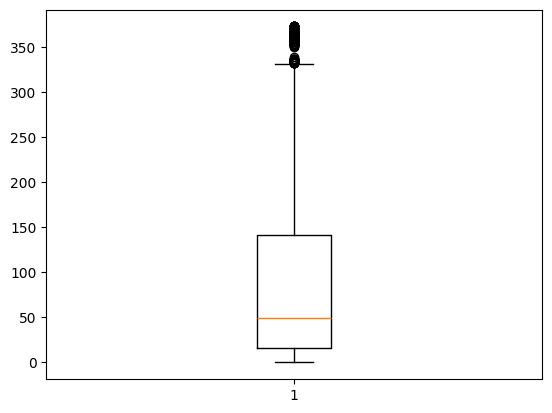

In [88]:
#outlier treatment
plt.boxplot(grouped_data.recency)

In [89]:
#two types of outliers
#-statistical
#-domain specific

In [90]:
#outlier treatment for amount
q1=grouped_data.amount.quantile(0.05)
q3=grouped_data.amount.quantile(0.95)
iqr=(q3-q1)
grouped_data=grouped_data[(grouped_data['amount']>=(q1-iqr*(1.5))) & (grouped_data['amount']<=(q3+iqr*(1.5)))]

#outlier treatment for recency
q1=grouped_data.recency.quantile(0.05)
q3=grouped_data.recency.quantile(0.95)
iqr=(q3-q1)
grouped_data=grouped_data[(grouped_data['recency']>=(q1-iqr*(1.5))) & (grouped_data['recency']<=(q3+iqr*(1.5)))]

#outlier treatment for frequency
q1=grouped_data.frequency.quantile(0.05)
q3=grouped_data.frequency.quantile(0.95)
iqr=(q3-q1)
grouped_data=grouped_data[(grouped_data['frequency']>=(q1-iqr*(1.5))) & (grouped_data['frequency']<=(q3+iqr*(1.5)))]

In [92]:
#rescaling
col=grouped_data[['amount','frequency','recency']]

#instantiate
scaler=StandardScaler()
scaled=scaler.fit_transform(col)
scaled.shape

(4293, 3)

In [96]:
scaled_data=pd.DataFrame(scaled,columns=['amount','frequency','recency'])
scaled_data

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188
...,...,...,...
4288,-0.624669,-0.683068,-0.193560
4289,-0.620853,-0.673094,1.826341
4290,-0.677696,-0.703017,0.865898
4291,-0.623131,-0.643171,-0.847057


In [97]:
#Modelling
#k-means with some arbitrary k
kmeans=KMeans(n_clusters=4,max_iter=100)
kmeans.fit(scaled_data)

c:\users\dell e5440\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=100, n_clusters=4)

In [98]:
kmeans.labels_

array([2, 0, 3, ..., 2, 3, 3])

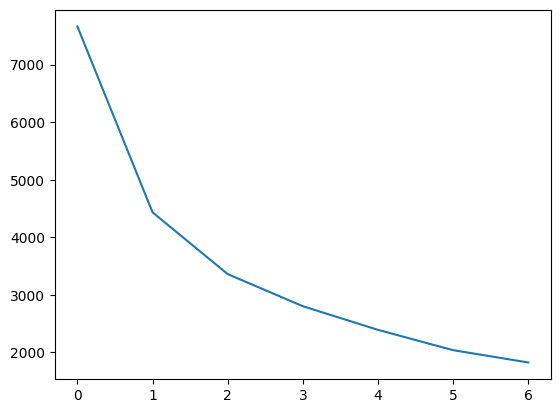

In [103]:
# optimized k value using elbow method (sum of squared distances when we assume n clusters)
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num in range_n_clusters:
    kmeans=KMeans(n_clusters=num,max_iter=50)
    kmeans.fit(scaled_data)
    ssd.append(kmeans.inertia_)

#plot the ssd for each n_clusters
#ssd
plt.plot(ssd)

In [104]:
#here we have confusion b/w 2 and 3 ,so we can calculate silhouette score
'''Silhouette analysis can be used to study the separation distance between the resulting clusters.
The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides 
a way to assess parameters like number of clusters visually.This measure has a range of [-1, 1].
Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters.
A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate
that those samples might have been assigned to the wrong cluster.'''

'Silhouette analysis can be used to study the separation distance between the resulting clusters.\nThe silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides \na way to assess parameters like number of clusters visually.This measure has a range of [-1, 1].\nSilhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters.\nA value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate\nthat those samples might have been assigned to the wrong cluster.'

In [106]:
#silhouette analysis
range_n_clusters=[2,3,4,5,6,7,8]
for num in range_n_clusters:
    kmeans=KMeans(n_clusters=num,max_iter=50)
    kmeans.fit(scaled_data)
    cluster_labels=kmeans.labels_

    #silhouette score
    silhouette_avg=silhouette_score(scaled_data,cluster_labels)
    print('for num={0}, the silhouette score is {1}'.format(num,silhouette_avg))

for num=2, the silhouette score is 0.5415858652525395
for num=3, the silhouette score is 0.5084896296141937
for num=4, the silhouette score is 0.4781841150952288
for num=5, the silhouette score is 0.46399070900769845
for num=6, the silhouette score is 0.41759340426856373
for num=7, the silhouette score is 0.41769166762959486
for num=8, the silhouette score is 0.39609381883999467


In [107]:
#final model with k=2
kmeans=KMeans(n_clusters=2,max_iter=50)
kmeans.fit(scaled_data)

KMeans(max_iter=50, n_clusters=2)

In [108]:
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [110]:
#assign the label
grouped_data['cluster_id']=kmeans.labels_
grouped_data.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,0


In [112]:
grouped_data[grouped_data['cluster_id']==0].head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,0
5,12352.0,1545.41,95,35,0


In [113]:
grouped_data[grouped_data['cluster_id']==1].head()

,CustomerID,amount,frequency,recency,cluster_id
1,12347.0,4310.00,182,1,1
10,12357.0,6207.67,131,32,1
12,12359.0,6245.53,254,7,1
15,12362.0,5154.58,274,2,1
20,12370.0,3545.69,167,50,1


In [ ]:
#here cluster 1 has stable customers
#cluster 0 has risky customers

<Axes: xlabel='cluster_id', ylabel='amount'>

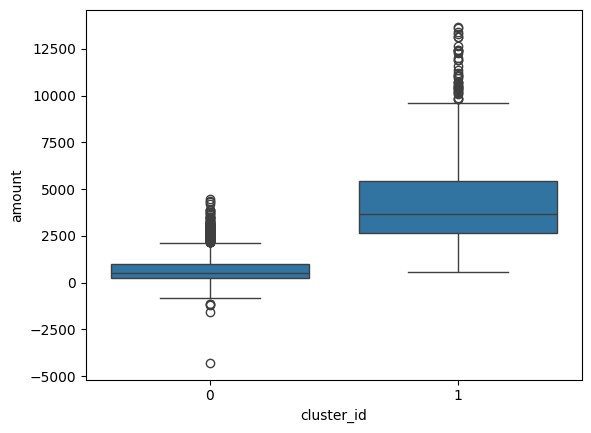

In [114]:
#plot
sns.boxplot(x='cluster_id',y='amount',data=grouped_data)

In [115]:
#hierarchical clustering
scaled_data.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


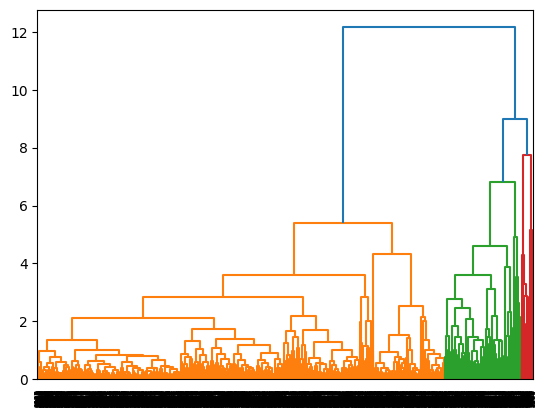

In [122]:
#complete linkage
mergings=linkage(scaled_data,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [123]:
# 3 clusters
cluster_labels=cut_tree(mergings,n_clusters=2).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [124]:
grouped_data['cluster_labels']=cluster_labels
grouped_data

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,0,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,0,0
...,...,...,...,...,...,...
4366,18278.0,173.90,9,73,0,0
4367,18280.0,180.60,10,277,0,0
4368,18281.0,80.82,7,180,0,0
4369,18282.0,176.60,13,7,0,0


In [130]:
from sklearn.decomposition import PCA
pca=PCA()
pca_values=pca.fit_transform(scaled_data)
pca_values

array([[-1.98375131e+00,  1.56540958e+00, -4.77012383e-02],
       [ 2.15627885e+00,  1.12868290e-01,  4.94608007e-01],
       [-2.12674087e-02, -1.96067361e-01,  5.47604541e-01],
       ...,
       [-1.26482833e+00,  3.21702461e-01, -5.57210644e-04],
       [-4.07091579e-01, -1.16219539e+00,  5.51873798e-02],
       [ 3.84162042e-01, -3.53435903e-01,  2.96426558e-01]])

In [131]:
variance=pca.explained_variance_ratio_
variance

array([0.64204386, 0.25127156, 0.10668459])

In [132]:
np.cumsum(np.round(variance,4)*100)

array([ 64.2 ,  89.33, 100.  ])

In [134]:
pca=PCA(n_components=2)
df_pca_1=pca.fit_transform(scaled_data)
df_pca_1

array([[-1.98375131,  1.56540958],
       [ 2.15627885,  0.11286829],
       [-0.02126741, -0.19606736],
       ...,
       [-1.26482833,  0.32170246],
       [-0.40709158, -1.16219539],
       [ 0.38416204, -0.3534359 ]])

In [135]:
PCA_df=pd.DataFrame(df_pca_1,columns=['PC1','PC2'])

In [136]:
PCA_df

,PC1,PC2
0,-1.983751,1.565410
1,2.156279,0.112868
2,-0.021267,-0.196067
3,0.483717,-0.571424
4,-1.697528,1.536121
...,...,...
4288,-0.733063,-0.594414
4289,-1.651024,1.203283
4290,-1.264828,0.321702
4291,-0.407092,-1.162195


In [137]:
PCA_df['cluster_id']=kmeans.labels_

In [138]:
PCA_df['cluster_id']=PCA_df['cluster_id'].astype('category')
PCA_df['cluster_id']

0       0
1       1
2       0
3       0
4       0
       ..
4288    0
4289    0
4290    0
4291    0
4292    0
Name: cluster_id, Length: 4293, dtype: category
Categories (2, int32): [0, 1]

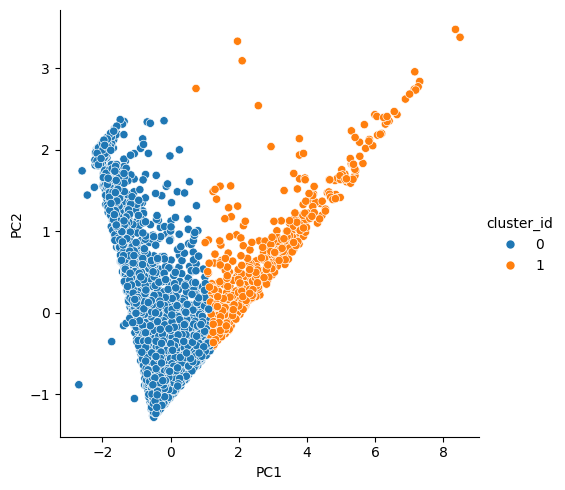

In [139]:
sns.relplot(x='PC1',y='PC2',hue='cluster_id',data=PCA_df)